### 분석준비

In [1]:
# 필요 라이브러리

# 분석을 위한 라이브러리
import numpy as np
import pandas as pd

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
import os

# 에러메세지 안나오게
import warnings
warnings.filterwarnings('ignore')

# pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns',None)
# pd.set_option('display.max_rows',None)

sns.set(font_scale=1)

# 그래프 한글 적용
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

# 디비 연결
import psycopg2
import json

def rds_python_conn():
    # rds와 python 연동을 위한 정보 입력
    with open('postgres.info.json','r') as json_file:
        db_info = json.load(json_file)

    host = db_info.get('host')
    dbname = 'postgres' 
    user = 'postgres' 
    password = db_info.get('password')
    port = 5432

    connection = psycopg2.connect(host=host,
                                  dbname=dbname ,
                                  user=user ,
                                  password=password ,
                                  port=port)
    return connection

### 잠재고객 EDA

In [7]:
SQL = """
SELECT *
FROM mql m full outer join closed_deals j on m.mql_id=j.mql_id
;
"""
mql = pd.read_sql(SQL, rds_python_conn())
mql

,mql_id,first_contact_date,landing_page_id,origin,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,business_type,declared_monthly_revenue
0,5143,2018-02-01,490,social,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
1,5819,2017-10-20,247,paid_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
2,1369,2018-03-22,95,organic_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
3,312,2018-01-22,435,email,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
4,3690,2018-02-21,119,organic_search,3690.0,2187.0,17.0,2.0,2018-02-26 19:58:54,pet,online_medium,cat,reseller,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,2920,2018-05-22,300,paid_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
7996,3895,2018-03-27,269,paid_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
7997,7527,2017-08-27,119,organic_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN
7998,639,2017-10-06,489,organic_search,NaN,NaN,NaN,NaN,NaT,None,None,None,None,NaN


In [8]:
mql['won_date_new'] = pd.to_datetime(mql['won_date']).dt.strftime('%Y-%m')
mql['first_contact_date_new'] = pd.to_datetime(mql['first_contact_date']).dt.strftime('%Y-%m')

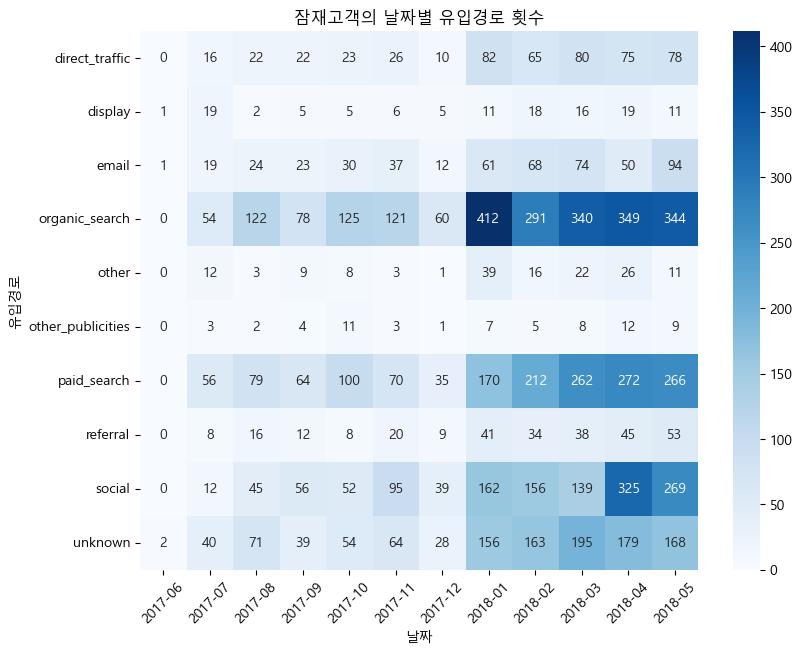

In [9]:
q1 = pd.pivot_table(mql,
                   index='origin',
                   columns=pd.to_datetime(mql['first_contact_date']).dt.strftime('%Y-%m'),
                   values='landing_page_id',                            
                   aggfunc='count',
                   fill_value=0)

# 그래프 크기 조정
plt.figure(figsize=(9, 7))

# Heatmap 그리기
sns.heatmap(q1, annot=True, fmt='d', cmap='Blues')

# 그래프 타이틀 설정
plt.title('잠재고객의 날짜별 유입경로 횟수')

# x축과 y축 레이블 설정
plt.xlabel('날짜')
plt.ylabel('유입경로')
plt.xticks(rotation=45)

# 폰트 크기 설정
sns.set(font_scale=1)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, '2017-12'),
  Text(1.5, 0, '2018-01'),
  Text(2.5, 0, '2018-02'),
  Text(3.5, 0, '2018-03'),
  Text(4.5, 0, '2018-04'),
  Text(5.5, 0, '2018-05'),
  Text(6.5, 0, '2018-06'),
  Text(7.5, 0, '2018-07'),
  Text(8.5, 0, '2018-08'),
  Text(9.5, 0, '2018-09'),
  Text(10.5, 0, '2018-10'),
  Text(11.5, 0, '2018-11')])

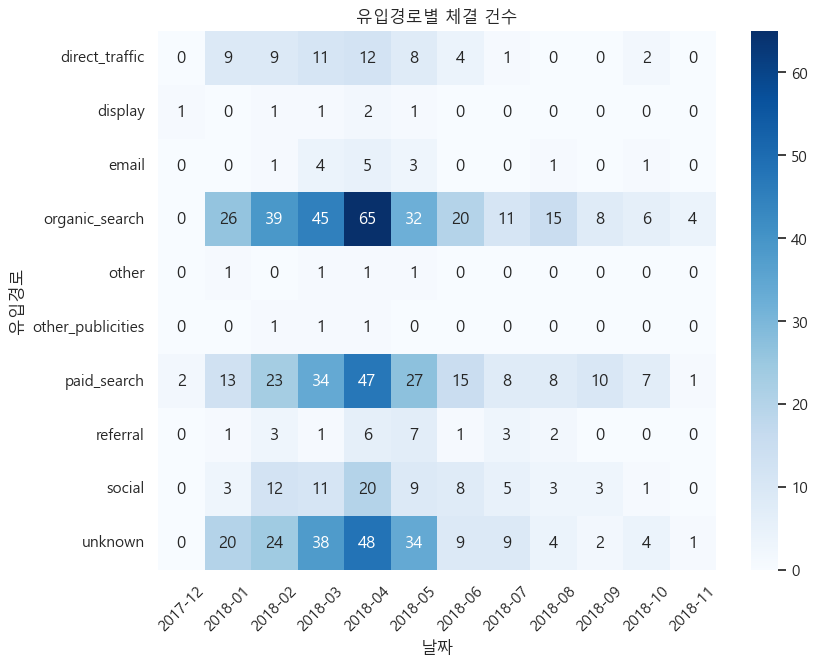

In [12]:
q1 = pd.pivot_table(mql,
                   index='origin',
                   columns='won_date_new',
                   values='seller_id',                            
                   aggfunc='count',
                   fill_value=0)

# 그래프 크기 조정
plt.figure(figsize=(9, 7))

# Heatmap 그리기
sns.heatmap(q1, annot=True, fmt='d', cmap='Blues')

# 그래프 타이틀 설정
plt.title('유입경로별 체결 건수')

# x축과 y축 레이블 설정
plt.xlabel('날짜')
plt.ylabel('유입경로')
plt.xticks(rotation=45)

Text(0.5, 1.0, '비즈니스 타입별 매출')

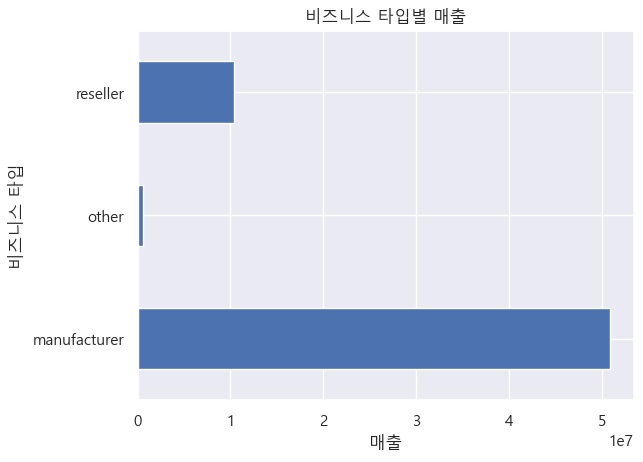

In [15]:
mql.groupby('business_type')['declared_monthly_revenue'].sum().plot(kind='barh')
plt.xlabel('매출')
plt.ylabel('비즈니스 타입')
plt.title('비즈니스 타입별 매출')

Text(0.5, 1.0, '비즈니스 타입별 판매자현황')

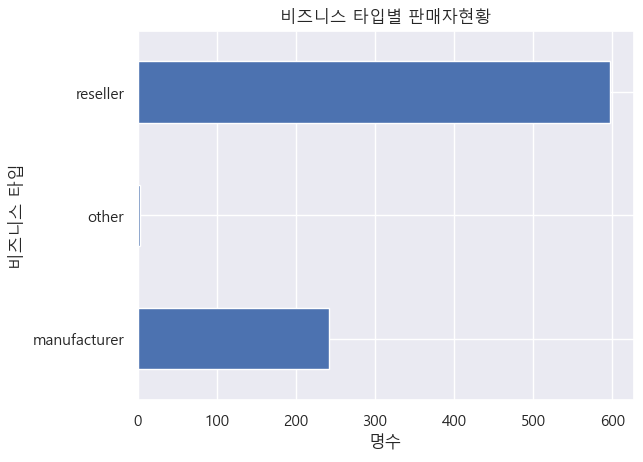

In [16]:
mql.groupby('business_type')['mql_id'].size().plot(kind='barh')
plt.xlabel('명수')
plt.ylabel('비즈니스 타입')
plt.title('비즈니스 타입별 판매자현황')

Text(0.5, 0, '비즈니스타입')

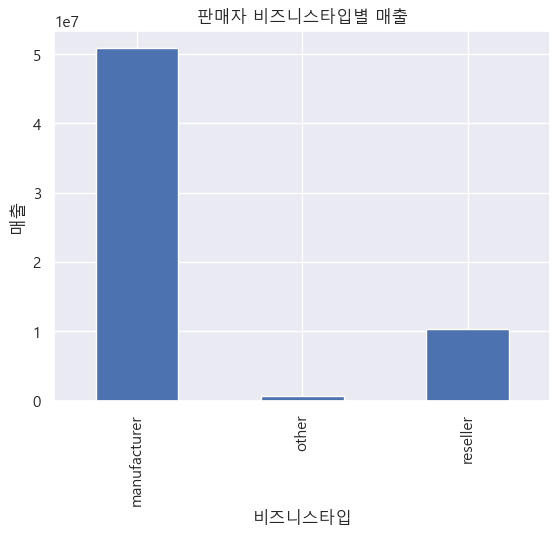

In [14]:
mql.groupby('business_type')['declared_monthly_revenue'].sum().plot(kind='bar')
plt.title('판매자 비즈니스타입별 매출')
plt.ylabel('매출')
plt.xlabel('비즈니스타입')

Text(0, 0.5, '비즈니스분야')

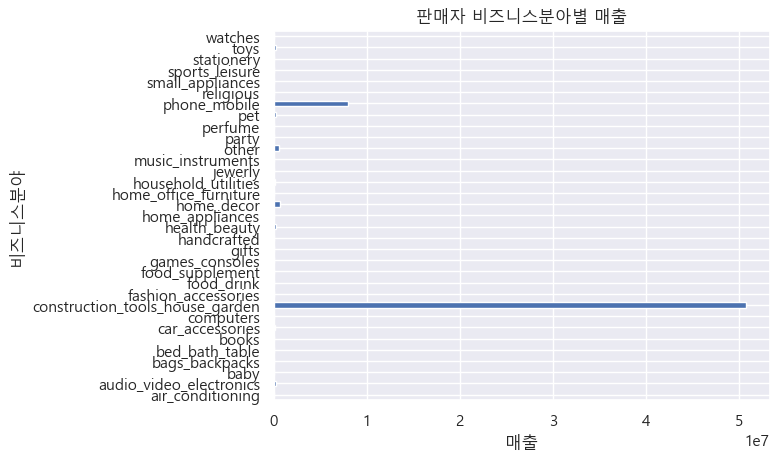

In [20]:
mql.groupby('business_segment')['declared_monthly_revenue'].sum().plot(kind='barh')
plt.title('판매자 비즈니스분아별 매출')
plt.xlabel('매출')
plt.ylabel('비즈니스분야')

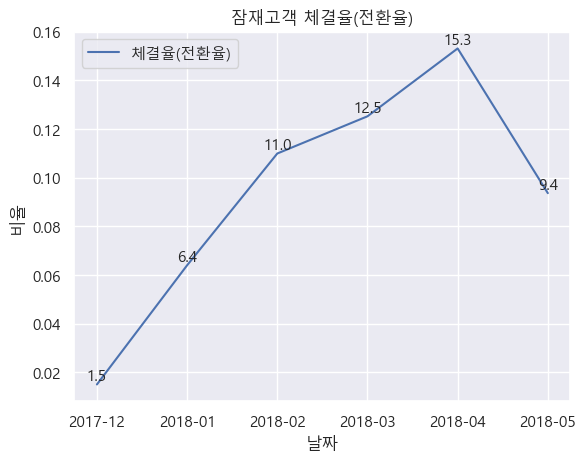

In [14]:
a=mql.groupby(pd.to_datetime(mql['won_date']).dt.strftime('%Y-%m'))['mql_id'].size().reset_index(name='체결된사람')
b=mql.groupby(pd.to_datetime(mql['first_contact_date']).dt.strftime('%Y-%m'))['mql_id'].size().reset_index(name='컨택한 사람')
ab = a.merge(b,left_on='won_date',right_on='first_contact_date',how='outer').fillna(0)
ab['ratio'] = ab['체결된사람'] / ab['컨택한 사람']
ab[0:6].plot(x='first_contact_date', y='ratio', label='체결율(전환율)')
plt.title('잠재고객 체결율(전환율)')
plt.ylabel('비율')
plt.xlabel('날짜')
for i, v in enumerate(ab[0:6]['ratio']):
    plt.text(i, v, round(v*100,1), ha='center', va='bottom', fontsize=11)

Text(0, 0.5, '성향')

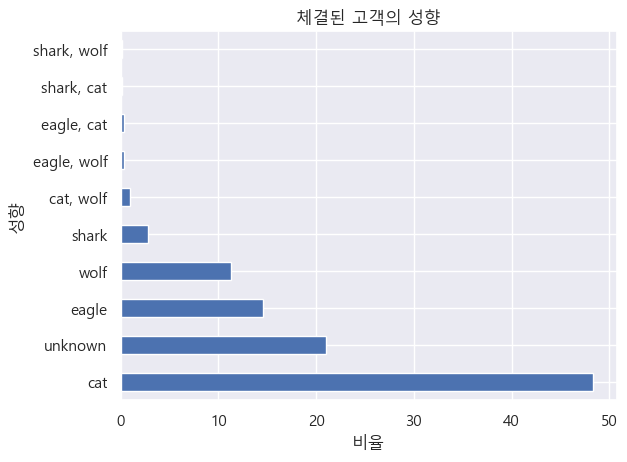

In [120]:
(mql.lead_behaviour_profile.value_counts(normalize=True)*100).plot(kind='barh')
plt.title('체결된 고객의 성향')
plt.xlabel('비율')
plt.ylabel('성향')

Text(0, 0.5, '비즈니스 분야')

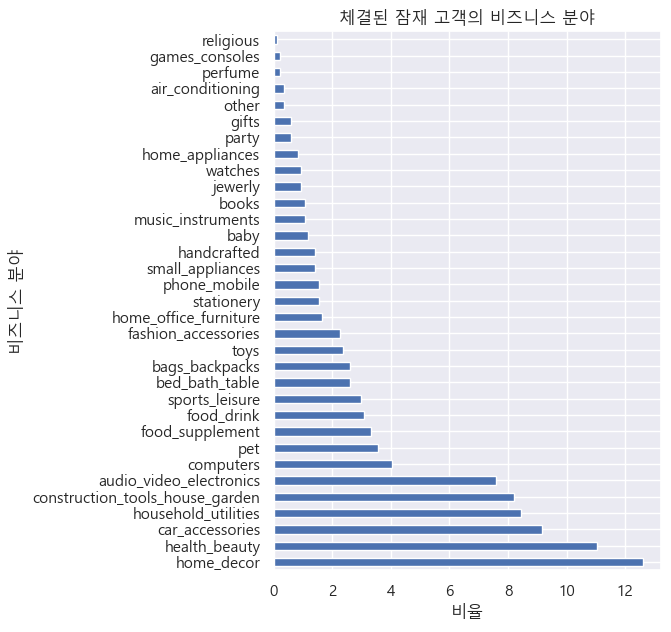

In [126]:
(mql.business_segment.value_counts(normalize=True)*100).plot(kind='barh', figsize=(5,7))
plt.title('체결된 잠재 고객의 비즈니스 분야')
plt.xlabel('비율')
plt.ylabel('비즈니스 분야')

Text(0, 0.5, '유입 경로')

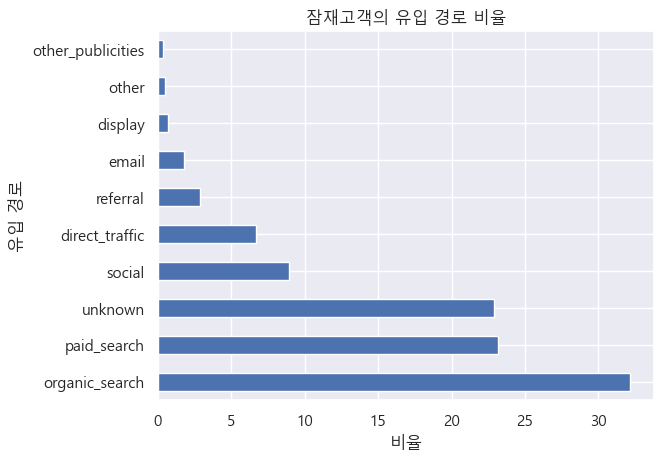

In [117]:
(mql[mql.won_date.notnull()].origin.value_counts(normalize=True)*100).plot(kind='barh')
plt.title('잠재고객의 유입 경로 비율')
plt.xlabel('비율')
plt.ylabel('유입 경로')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


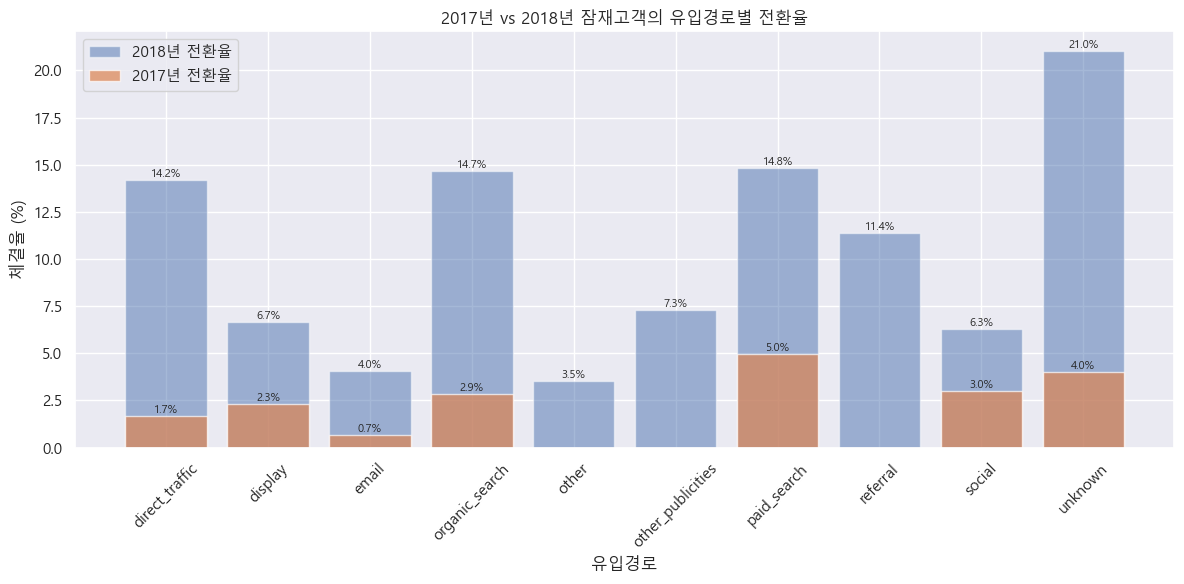

In [37]:
plt.figure(figsize=(12, 6))

# 2018년 전환율 계산 및 그래프 그리기
a_2018 = mql[(mql['won_date'].notnull()) & (mql['first_contact_date'].dt.year == 2018)].groupby('origin').size() / \
         mql[mql['first_contact_date'].dt.year == 2018].groupby('origin').size() * 100
plt.bar(a_2018.index, a_2018, alpha=0.5, label='2018년 전환율')

# 2017년 전환율 계산 및 그래프 그리기
a_2017 = mql[(mql['won_date'].notnull()) & (mql['first_contact_date'].dt.year == 2017)].groupby('origin').size() / \
         mql[mql['first_contact_date'].dt.year == 2017].groupby('origin').size() * 100
plt.bar(a_2017.index, a_2017, alpha=0.7, label='2017년 전환율')

# 그래프 안에 글씨 추가
for i, v in enumerate(a_2018):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)
for i, v in enumerate(a_2017):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=8)

# x축 레이블 설정
plt.xticks(rotation=45)

# x축과 y축 레이블 설정
plt.xlabel('유입경로')
plt.ylabel('체결율 (%)')

# 레전드 추가
plt.legend()

# 제목 추가
plt.title('2017년 vs 2018년 잠재고객의 유입경로별 전환율')

# 그래프 보여주기
plt.tight_layout()
plt.show()


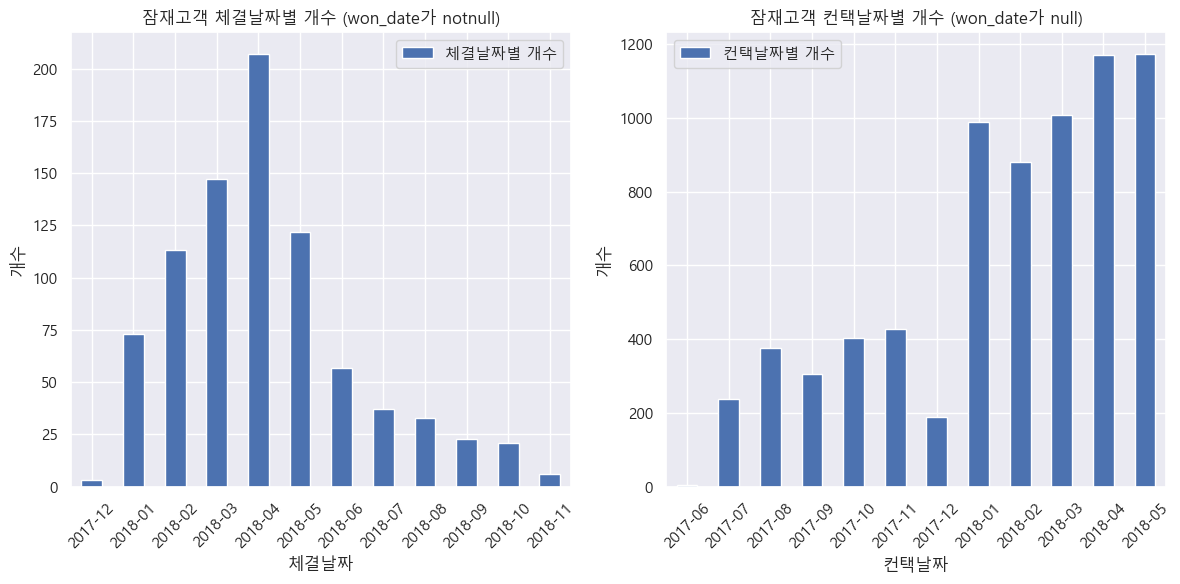

In [58]:
# 데이터프레임에서 날짜 포맷 변환
mql['won_date_new'] = pd.to_datetime(mql['won_date']).dt.strftime('%Y-%m')
mql['contact_date_new'] = pd.to_datetime(mql['first_contact_date']).dt.strftime('%Y-%m')

# 그래프 크기 설정
plt.figure(figsize=(12, 6))

# 첫 번째 서브플롯: 컨택날짜별 개수 (won_date가 notnull인 경우)
plt.subplot(1, 2, 1)
ax1 = mql[mql['won_date'].notnull()].groupby('won_date_new').size().plot(kind='bar',label='체결날짜별 개수')
plt.title('잠재고객 체결날짜별 개수 (won_date가 notnull)')
plt.ylabel('개수')
plt.xlabel('체결날짜')
plt.xticks(rotation=45)
ax1.legend()

# 두 번째 서브플롯: 컨택날짜별 개수 (won_date가 null인 경우)
plt.subplot(1, 2, 2)
ax2 = mql[mql['won_date'].isnull()].groupby('contact_date_new')['origin'].count().plot(kind='bar', label='컨택날짜별 개수')
plt.title('잠재고객 컨택날짜별 개수 (won_date가 null)')
plt.ylabel('개수')
plt.xlabel('컨택날짜')
plt.xticks(rotation=45)
ax2.legend()

# 서브플롯 간 간격 조절
plt.tight_layout()

# 그래프 보여주기
plt.show()


<Axes: xlabel='sdr_id'>

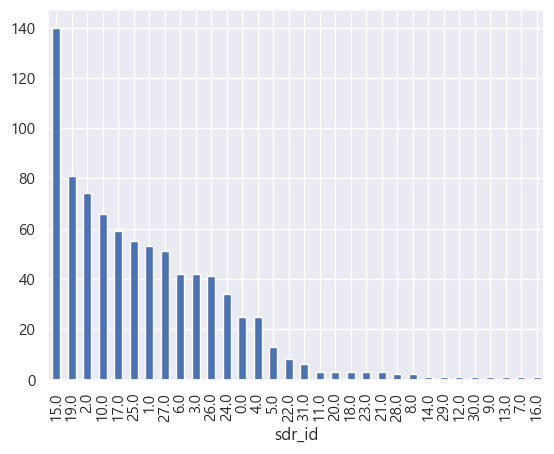

In [52]:
# sdr 직원 분포
mql.sdr_id.value_counts().plot(kind='bar')

<Axes: xlabel='sr_id'>

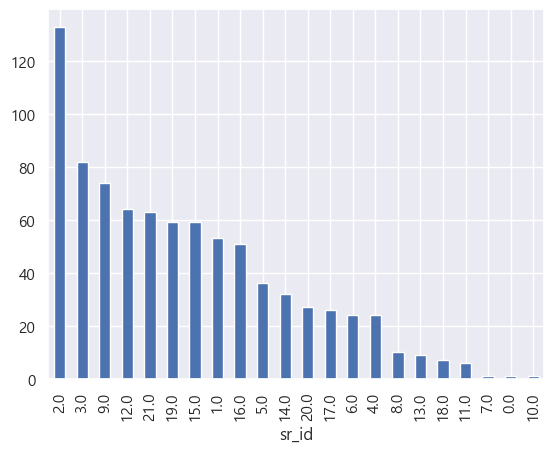

In [53]:
# sr 직원 분포
mql.sr_id.value_counts().plot(kind='bar')

회사 성격별 개수와 매출합계


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'cat'),
  Text(1, 0, 'unknown'),
  Text(2, 0, 'eagle'),
  Text(3, 0, 'wolf'),
  Text(4, 0, 'shark'),
  Text(5, 0, 'cat, wolf'),
  Text(6, 0, 'eagle, wolf'),
  Text(7, 0, 'eagle, cat'),
  Text(8, 0, 'shark, wolf'),
  Text(9, 0, 'shark, cat')])

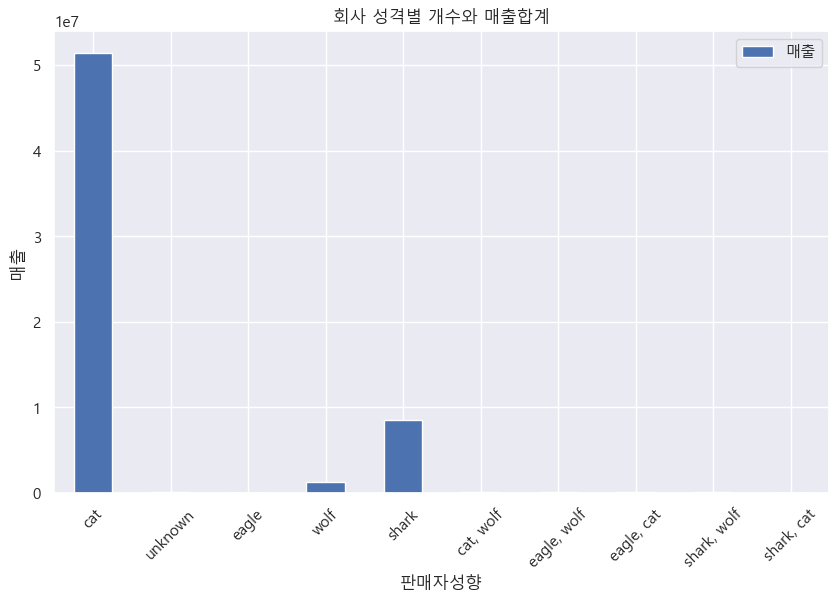

In [65]:
SQL = """
SELECT lead_behaviour_profile,count(lead_behaviour_profile) as 판매자성향,
        sum(declared_monthly_revenue) as 매출
FROM mql m join closed_deals j on m.mql_id=j.mql_id
group by lead_behaviour_profile
order by 2 desc;
"""


mql = pd.read_sql(SQL, rds_python_conn())
print('회사 성격별 개수와 매출합계')
mql.plot(x='lead_behaviour_profile', y='매출', kind='bar', figsize=(10, 6))
plt.title('회사 성격별 개수와 매출합계')
plt.xlabel('판매자성향')
plt.ylabel('매출')
plt.xticks(rotation=45)


In [103]:
SQL = """
SELECT business_segment,business_type,count(business_segment)
FROM mql m join closed_deals j on m.mql_id=j.mql_id
group by business_segment, business_type
order by 1,3 desc;
"""

rows = sql(SQL)
mql = pd.DataFrame(rows)
print('회사 사업 분야, 비즈니스타입별 개수')
mql

회사 사업 분야, 비즈니스타입별 개수


,0,1,2
0,air_conditioning,reseller,3
1,audio_video_electronics,reseller,58
2,audio_video_electronics,manufacturer,6
3,baby,reseller,6
4,baby,manufacturer,4
5,bags_backpacks,reseller,12
6,bags_backpacks,manufacturer,10
7,bed_bath_table,reseller,15
8,bed_bath_table,manufacturer,7
9,books,reseller,6


### 구매자 EDA

In [27]:
# ('delivered','shipped','invoiced','processing') 이경우만 가지고 파악.
SQL = """
SELECT *
FROM "order"
WHERE order_status in ('delivered','shipped','invoiced','processing') and order_purchase_timestamp < '2018-09-01'
order by order_id
"""


order = pd.read_sql(SQL, rds_python_conn())
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,0,10071,delivered,2017-02-13 16:12:43,2017-02-13 16:25:09,2017-02-14 10:58:44,2017-03-01 11:16:06,2017-03-24
1,1,36159,delivered,2018-01-07 21:13:42,2018-01-07 21:27:12,2018-01-10 18:36:40,2018-01-15 20:10:13,2018-01-31
2,2,23371,delivered,2018-08-23 13:56:50,2018-08-23 14:10:15,2018-08-23 15:42:00,2018-08-27 18:32:55,2018-09-04
3,3,31171,delivered,2017-12-12 08:39:09,2017-12-12 10:32:39,2017-12-13 18:38:53,2017-12-18 20:09:12,2018-01-11
4,4,53810,delivered,2017-11-08 15:02:42,2017-11-09 15:11:00,2017-11-16 19:34:27,2017-11-21 12:52:26,2017-11-22
...,...,...,...,...,...,...,...,...
98194,99436,27340,delivered,2018-05-08 19:42:13,2018-05-08 20:31:59,2018-05-09 12:39:00,2018-05-16 23:38:52,2018-05-22
98195,99437,87752,delivered,2017-07-05 11:56:09,2017-07-05 17:43:11,2017-07-11 16:34:32,2017-07-19 20:34:51,2017-08-04
98196,99438,92997,delivered,2017-07-05 18:06:31,2017-07-05 18:23:31,2017-07-07 13:49:57,2017-07-10 19:15:30,2017-07-21
98197,99439,97562,delivered,2017-10-27 12:07:08,2017-10-27 12:28:41,2017-10-30 13:21:46,2017-11-14 17:47:07,2017-11-21


In [28]:
SQL = """
SELECT customer_id, customer_unique_id
FROM customers
"""


uniqueid = pd.read_sql(SQL, rds_python_conn())
uniqueid

,customer_id,customer_unique_id
0,93596,86343
1,96387,55527
2,71593,44820
3,17589,36016
4,46972,96049
...,...,...
99436,40421,29126
99437,65930,3710
99438,83443,38830
99439,52687,79036


In [29]:
order_uniqueid = order.merge(uniqueid,on='customer_id',how='left')
order_uniqueid

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,0,10071,delivered,2017-02-13 16:12:43,2017-02-13 16:25:09,2017-02-14 10:58:44,2017-03-01 11:16:06,2017-03-24,21081
1,1,36159,delivered,2018-01-07 21:13:42,2018-01-07 21:27:12,2018-01-10 18:36:40,2018-01-15 20:10:13,2018-01-31,9745
2,2,23371,delivered,2018-08-23 13:56:50,2018-08-23 14:10:15,2018-08-23 15:42:00,2018-08-27 18:32:55,2018-09-04,53790
3,3,31171,delivered,2017-12-12 08:39:09,2017-12-12 10:32:39,2017-12-13 18:38:53,2017-12-18 20:09:12,2018-01-11,60982
4,4,53810,delivered,2017-11-08 15:02:42,2017-11-09 15:11:00,2017-11-16 19:34:27,2017-11-21 12:52:26,2017-11-22,77280
...,...,...,...,...,...,...,...,...,...
98194,99436,27340,delivered,2018-05-08 19:42:13,2018-05-08 20:31:59,2018-05-09 12:39:00,2018-05-16 23:38:52,2018-05-22,84335
98195,99437,87752,delivered,2017-07-05 11:56:09,2017-07-05 17:43:11,2017-07-11 16:34:32,2017-07-19 20:34:51,2017-08-04,33367
98196,99438,92997,delivered,2017-07-05 18:06:31,2017-07-05 18:23:31,2017-07-07 13:49:57,2017-07-10 19:15:30,2017-07-21,48993
98197,99439,97562,delivered,2017-10-27 12:07:08,2017-10-27 12:28:41,2017-10-30 13:21:46,2017-11-14 17:47:07,2017-11-21,69845


In [30]:
# ('delivered','shipped','invoiced','processing') 이경우만 가지고 파악.
SQL = """
SELECT *
FROM "order" o join payments p on o.order_id=p.order_Id 
WHERE order_status in ('delivered','shipped','invoiced','processing') 
order by o.order_id
"""


orderpayment = pd.read_sql(SQL, rds_python_conn())
orderpayment = orderpayment.loc[:, ~orderpayment.columns.duplicated()]
orderpayment

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,0,10071,delivered,2017-02-13 16:12:43,2017-02-13 16:25:09,2017-02-14 10:58:44,2017-03-01 11:16:06,2017-03-24,1,credit_card,2,104.87
1,1,36159,delivered,2018-01-07 21:13:42,2018-01-07 21:27:12,2018-01-10 18:36:40,2018-01-15 20:10:13,2018-01-31,1,credit_card,3,126.54
2,2,23371,delivered,2018-08-23 13:56:50,2018-08-23 14:10:15,2018-08-23 15:42:00,2018-08-27 18:32:55,2018-09-04,1,credit_card,8,279.11
3,3,31171,delivered,2017-12-12 08:39:09,2017-12-12 10:32:39,2017-12-13 18:38:53,2017-12-18 20:09:12,2018-01-11,1,credit_card,7,73.64
4,4,53810,delivered,2017-11-08 15:02:42,2017-11-09 15:11:00,2017-11-16 19:34:27,2017-11-21 12:52:26,2017-11-22,1,credit_card,2,24.68
...,...,...,...,...,...,...,...,...,...,...,...,...
102561,99436,27340,delivered,2018-05-08 19:42:13,2018-05-08 20:31:59,2018-05-09 12:39:00,2018-05-16 23:38:52,2018-05-22,1,credit_card,10,1057.88
102562,99437,87752,delivered,2017-07-05 11:56:09,2017-07-05 17:43:11,2017-07-11 16:34:32,2017-07-19 20:34:51,2017-08-04,1,credit_card,1,264.66
102563,99438,92997,delivered,2017-07-05 18:06:31,2017-07-05 18:23:31,2017-07-07 13:49:57,2017-07-10 19:15:30,2017-07-21,1,credit_card,1,27.77
102564,99439,97562,delivered,2017-10-27 12:07:08,2017-10-27 12:28:41,2017-10-30 13:21:46,2017-11-14 17:47:07,2017-11-21,1,credit_card,1,61.05


In [117]:
# 객단가
# 가설 1 : 매출이 감소한건 객단가가 감소했기 때문이다.
# 전체기간기준
print(orderpayment['payment_value'].sum())
orderpayment['payment_value'].sum()/orderpayment.shape[0]

15738207.83


153.44468761577912

In [31]:
orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum()

order_purchase_timestamp
2016-09        136.23
2016-10      51657.53
2016-12         19.62
2017-01     137006.76
2017-02     283560.32
2017-03     425656.40
2017-04     405808.92
2017-05     582926.16
2017-06     499827.47
2017-07     578858.58
2017-08     662071.77
2017-09     717195.22
2017-10     764785.28
2017-11    1172355.54
2017-12     861647.65
2018-01    1102639.41
2018-02     979828.63
2018-03    1152736.74
2018-04    1156303.91
2018-05    1145748.63
2018-06    1020494.29
2018-07    1039880.16
2018-08     996896.15
2018-09        166.46
Name: payment_value, dtype: float64

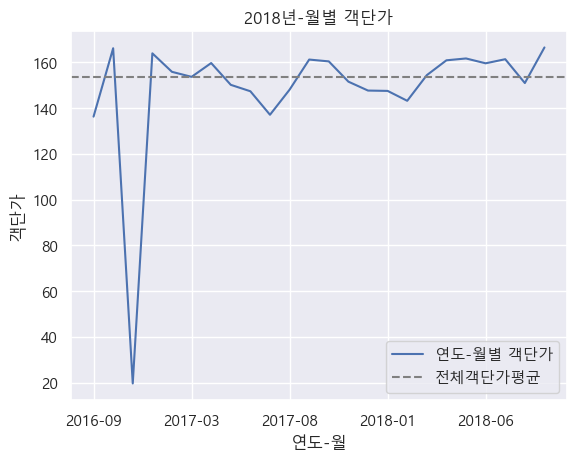

In [32]:
(orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum()/orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['order_id'].size()).plot(label='연도-월별 객단가')
plt.axhline(y=orderpayment['payment_value'].sum()/orderpayment.shape[0], color='gray', linestyle='--', label='전체객단가평균')
plt.title('2018년-월별 객단가')
plt.xlabel('연도-월')
plt.ylabel('객단가')

plt.legend()


In [33]:
orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['order_id'].size()

order_purchase_timestamp
2016-09       1
2016-10     311
2016-12       1
2017-01     836
2017-02    1820
2017-03    2771
2017-04    2542
2017-05    3883
2017-06    3393
2017-07    4224
2017-08    4473
2017-09    4450
2017-10    4769
2017-11    7738
2017-12    5837
2018-01    7477
2018-02    6845
2018-03    7468
2018-04    7189
2018-05    7088
2018-06    6397
2018-07    6446
2018-08    6606
2018-09       1
Name: order_id, dtype: int64

In [34]:
orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum()

order_purchase_timestamp
2016-09        136.23
2016-10      51657.53
2016-12         19.62
2017-01     137006.76
2017-02     283560.32
2017-03     425656.40
2017-04     405808.92
2017-05     582926.16
2017-06     499827.47
2017-07     578858.58
2017-08     662071.77
2017-09     717195.22
2017-10     764785.28
2017-11    1172355.54
2017-12     861647.65
2018-01    1102639.41
2018-02     979828.63
2018-03    1152736.74
2018-04    1156303.91
2018-05    1145748.63
2018-06    1020494.29
2018-07    1039880.16
2018-08     996896.15
2018-09        166.46
Name: payment_value, dtype: float64

Text(0, 0.5, '주문 건수')

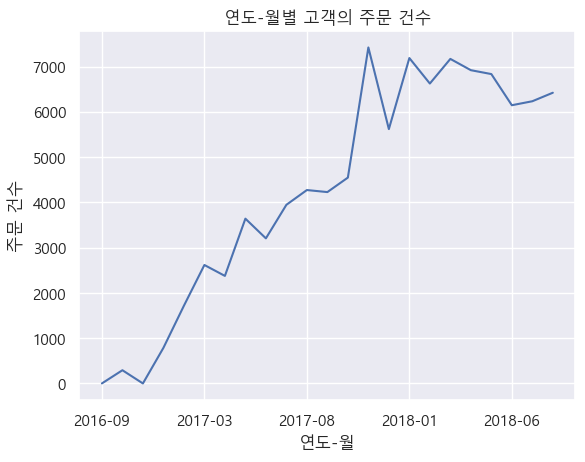

In [35]:
order_uniqueid.groupby(pd.to_datetime(order_uniqueid['order_purchase_timestamp']).dt.strftime('%Y-%m'))['customer_unique_id'].size().plot()
plt.title('연도-월별 고객의 주문 건수')
plt.xlabel('연도-월')
plt.ylabel('주문 건수')

In [71]:
str_li = []
for i in range(len(a.index)-1):
    str_li.append(a.index[i]+' > '+a.index[i+1])
str_li

['2016-09 > 2016-10',
 '2016-10 > 2016-12',
 '2016-12 > 2017-01',
 '2017-01 > 2017-02',
 '2017-02 > 2017-03',
 '2017-03 > 2017-04',
 '2017-04 > 2017-05',
 '2017-05 > 2017-06',
 '2017-06 > 2017-07',
 '2017-07 > 2017-08',
 '2017-08 > 2017-09',
 '2017-09 > 2017-10',
 '2017-10 > 2017-11',
 '2017-11 > 2017-12',
 '2017-12 > 2018-01',
 '2018-01 > 2018-02',
 '2018-02 > 2018-03',
 '2018-03 > 2018-04',
 '2018-04 > 2018-05',
 '2018-05 > 2018-06',
 '2018-06 > 2018-07',
 '2018-07 > 2018-08',
 '2018-08 > 2018-09']

Text(0, 0.5, '증가율')

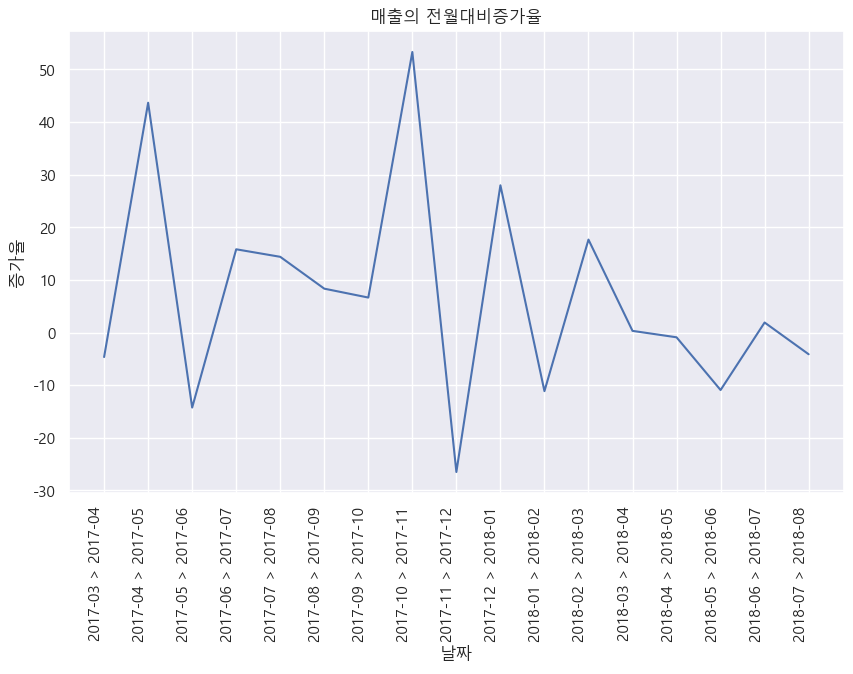

In [78]:
li=[]
for i in range(len(a)-1):
    li.append(round((a[i+1]-a[i])/a[i]*100,2))

plt.figure(figsize=(10, 6)) 
plt.plot(str_li[5:-1],li[5:-1])
plt.xticks(rotation=90, ha='right')
plt.title('매출의 전월대비증가율')
plt.xlabel('날짜')
plt.ylabel('증가율')

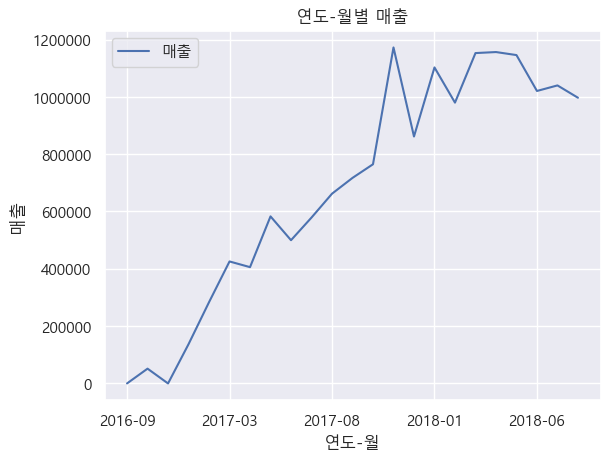

In [69]:
orderpayment.groupby(pd.to_datetime(orderpayment['order_purchase_timestamp']).dt.strftime('%Y-%m'))['payment_value'].sum().plot(label='매출')
plt.title('연도-월별 매출')
plt.xlabel('연도-월')
plt.ylabel('매출')
plt.ticklabel_format(style='plain', axis='y')
plt.legend()

# 2017년 11월에 최고점(1172355.54)을 찍고 그 후 상승과 하락을 반복.2018년 4월에서 8월까지는 계속 매출하락.

### 2017년 11월에 뭘 많이 샀는지?

In [7]:
SQL = """
SELECT *
FROM "order"
where order_status in ('delivered', 'shipped', 'invoiced', 'processing');
"""
order = pd.read_sql(SQL, rds_python_conn())
order

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,13974,65773,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,83165,13301,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,66104,44559,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,64037,69256,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,14183,35294,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
...,...,...,...,...,...,...,...,...
98195,63791,92532,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28
98196,85704,30689,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02
98197,19817,23177,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27
98198,6896,84231,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15


In [8]:
SQL = """
SELECT *
FROM order_items
;
"""
items = pd.read_sql(SQL, rds_python_conn())
items

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,96870,1,12130,2622,2017-09-19 09:45:35,58.90,13.29
1,9433,1,29611,1942,2017-05-03 11:05:13,239.90,19.93
2,87326,1,23255,1180,2018-01-18 14:48:30,199.00,17.87
3,91182,1,1404,620,2018-08-15 10:10:18,12.99,12.79
4,79789,1,30255,2293,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,59834,1,32313,3029,2018-05-02 04:11:01,299.99,43.41
112646,72009,1,25525,1470,2018-07-20 04:31:48,350.00,36.53
112647,56253,1,159,3059,2017-10-30 17:14:25,99.90,16.95
112648,89718,1,11543,1506,2017-08-21 00:04:32,55.99,8.72


In [10]:
SQL = """
SELECT *
FROM products
;
"""
product = pd.read_sql(SQL, rds_python_conn())
product

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,16234,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,6621,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,22240,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,18578,baby,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,14617,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,28216,furniture_decor,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,20353,construction_tools_lights,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,3826,bed_bath_table,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,29140,computers_accessories,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [12]:
tmp = items.merge(product, on='product_id',how='left')
df = order.merge(tmp,on='order_id',how='left')
df['new_date'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'bed_bath_table'),
  Text(1, 0, 'furniture_decor'),
  Text(2, 0, 'sports_leisure'),
  Text(3, 0, 'health_beauty'),
  Text(4, 0, 'garden_tools'),
  Text(5, 0, 'computers_accessories'),
  Text(6, 0, 'toys'),
  Text(7, 0, 'watches_gifts'),
  Text(8, 0, 'housewares'),
  Text(9, 0, 'telephony')])

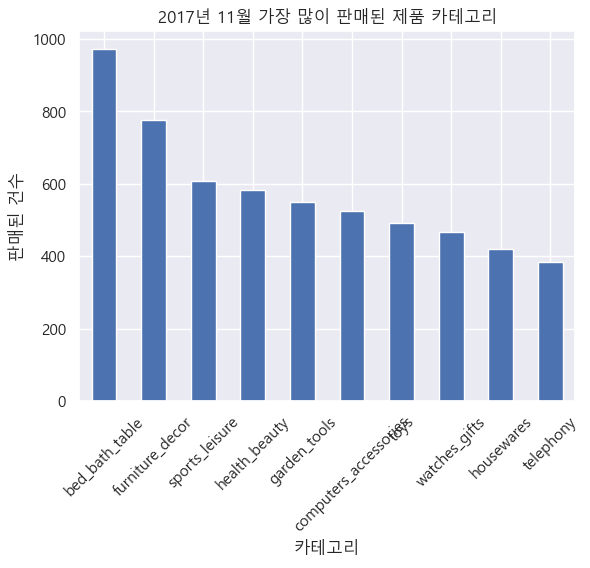

In [24]:
df[df['new_date']=='2017-11'].groupby('product_category_name')['order_id'].count().sort_values(ascending=False)[0:10].plot.bar()
plt.title('2017년 11월 가장 많이 판매된 제품 카테고리')
plt.xlabel('카테고리')
plt.ylabel('판매된 건수')
plt.xticks(rotation=45)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'health_beauty'),
  Text(1, 0, 'bed_bath_table'),
  Text(2, 0, 'computers_accessories'),
  Text(3, 0, 'sports_leisure'),
  Text(4, 0, 'furniture_decor'),
  Text(5, 0, 'housewares'),
  Text(6, 0, 'watches_gifts'),
  Text(7, 0, 'auto'),
  Text(8, 0, 'telephony'),
  Text(9, 0, 'garden_tools')])

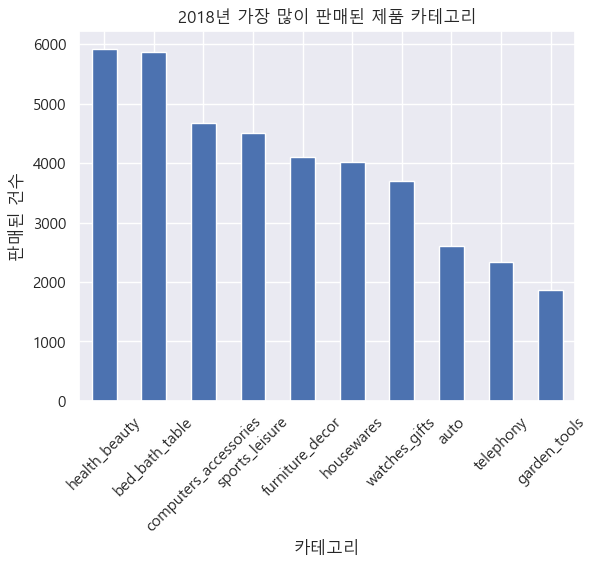

In [26]:
df[(df['new_date']>='2018-01')&(df['new_date']<'2018-09')].groupby('product_category_name')['order_id'].count().sort_values(ascending=False)[0:10].plot.bar()
plt.title('2018년 가장 많이 판매된 제품 카테고리')
plt.xlabel('카테고리')
plt.ylabel('판매된 건수')
plt.xticks(rotation=45)